# Análise do histórico dos últimos 5 anos dos ativos que atualmente compoem o Índice IBOV.

* Histórico de dividendos
* Delta Preço (Variação percentual do preço das ações no período)
* Frequência do Pagamento de Dividendos

Instalando a biblioteca yfinance

In [1]:
!pip install yfinance

Importando as bibliotecas que serão utilizadas

In [2]:
import yfinance as yf
import pandas as pd
import requests as req
import numpy as np


# Capturando os dados atualizados dos ativos que compõem o índice

Caso queira analisar uma carteira própria, você pode criar uma lista com os seus ativos, para criá-la utilize a sintaxe a seguir, substuindo os valores TICK1, TICK2 e TICK3 pelos seus ativos, sempre colocando eles entre aspas:

```python
carteira = ['TICK1', 'TICK2', 'TICK3']
```



Nós vamos pegar os dados da página https://br.advfn.com/indice/ibovespa

Mais precisamente dessa tabela:

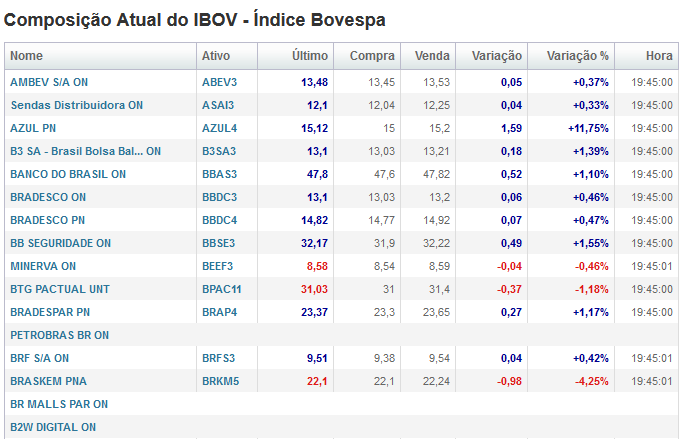

Como é possível observar, em algumas linhas ela está com dados faltantes, que iremos descartar para não atrapalhar a análise.
O último registro também será descartado, já que se trata do próprio índice IBOV

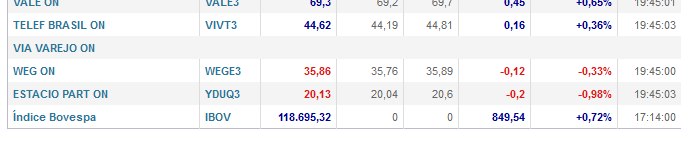

In [3]:
url = "https://br.advfn.com/indice/ibovespa"

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = req.get(url, headers=header)
data = pd.read_html(r.text)

In [4]:
ativos = data[3]

# verificando se a coluna ativo está sem o TICKER do ativo, caso esteja, substituir o valor para nulo para removê-los em seguida
ativos["Ativo"] = ativos.apply(lambda x: np.nan if x["Nome"] == x["Ativo"] else x["Ativo"], axis=1)

ativos_filtrados = ativos["Ativo"].dropna() # removendo os valores nulos
ativos_filtrados = pd.Series(ativos_filtrados[0:-1]) # filtrando até penúltimo item, pois o último é o próprio índice IBOV e se não removê-lo, irá dar erro na próxima etapa
ativos_filtrados.tail() # exibindo os 5 últimos ativos

76    USIM5
77    VALE3
78    VIVT3
80    WEGE3
81    YDUQ3
Name: Ativo, dtype: object

# Baixando as informações de cada ativo com a biblioteca Yahoo Finance

* Criamos variáveis para cada informação que iremos armazenar para a nossa análise.
* No final criamos um dataframe com as informações coletadas.

Caso você tenha optado para utilizar a sua própria carteira de ativos, aonde está ativos_filtrados, altere por carteira, ficando:
```python
for ativo in carteira:
  ...
```

Daí em diante não será necessário alterar mais nada

In [5]:
lista_d = []
for ativo in ativos_filtrados:
  df = yf.download(ativo+".SA", period="5y", actions=True)
  dp = (df["Adj Close"].iloc[-1] / df["Open"].iloc[0] * 100)
  td = (df["Dividends"].sum())
  d = df['Dividends']
  freq = d[d!=0].count()
  lista_d.append([ativo, dp, td, freq])

df_ibov = pd.DataFrame(lista_d, columns=['Ativo', 'DeltaP', 'DividendosT', 'Frequência'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ativo        71 non-null     object 
 1   DeltaP       71 non-null     float64
 2   DividendosT  71 non-null     float64
 3   Frequência   71 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


# ANÁLISES

## TOP 10 Empresas com maiores distribuições de dividendos nos últimos 5 anos

In [7]:
df_ibov.sort_values('DividendosT', ascending=False).head(10) # Para alterar a quantidade de exibição é só mudar o valor dentro do head e caso queira exibir em ordem crescente, altere para ascending=True

,Ativo,DeltaP,DividendosT,Frequência
53,PETR4,169.792701,30.093530,20
67,VALE3,117.226828,29.799873,10
52,PETR3,160.213213,29.692548,18
10,BRAP4,77.017331,18.109705,11
62,TAEE11,181.701035,16.535378,21
68,VIVT3,120.532323,16.324426,34
12,BRKM5,36.238379,15.126022,5
25,EGIE3,150.131905,14.557802,20
17,CPFE3,150.337829,13.911424,9
7,BBSE3,137.424374,13.522708,12


## TOP 10 Empresas com maiores retornos (%) de Delta P nos últimos 5 anos

In [8]:
df_ibov.sort_values('DeltaP', ascending=False).head(10) # Para alterar a quantidade de exibição é só mudar o valor dentro do head e caso queira exibir em ordem crescente, altere para ascending=True

,Ativo,DeltaP,DividendosT,Frequência
54,PRIO3,2493.199059,0.000000,0
9,BPAC11,599.715247,2.253494,12
43,JHSF3,425.217389,1.627168,19
18,CPLE6,417.633416,2.897032,10
69,WEGE3,378.567702,1.854472,30
29,ENEV3,372.234939,0.000000,0
64,TOTS3,340.096032,1.228624,12
31,EQTL3,282.809600,2.537726,6
58,RENT3,280.122547,3.350694,23
15,CMIG4,273.807693,4.314067,17


## TOP 10 Empresas com maiores frequências de pagamento de dividendos nos últimos 5 anos.

PS: Não significa que elas pagaram maiores quantias.

In [9]:
df_ibov.sort_values('Frequência', ascending=False).head(10) # Para alterar a quantidade de exibição é só mudar o valor dentro do head e caso queira exibir em ordem crescente, altere para ascending=True

,Ativo,DeltaP,DividendosT,Frequência
41,ITUB4,94.982815,5.551058,82
6,BBDC4,81.842728,5.458287,75
5,BBDC3,81.754779,4.458694,74
40,ITSA4,108.454517,2.496175,47
4,BBAS3,160.508703,13.040229,39
68,VIVT3,120.532323,16.324426,34
69,WEGE3,378.567702,1.854472,30
45,LREN3,54.552147,3.060502,26
14,CIEL3,25.970150,1.895818,26
3,B3SA3,177.309076,2.657516,25
